# Podstawy Przetwarzania Dużych Zbiorów Danych

Grupa IBD4 Poniedziałki 8:30

Łukasz Moskwa 247739

Artur Szewczykowski 252546


### 0.0 Importy i wczytanie do df

In [69]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df_data = pd.read_csv("../wyniki/final_data.csv")

In [70]:
display(df_data) #wrzucone dla wygody, można usunąc przed odpowiedzią

,Country_name,3_letter_code,population_urban,gdp_per_capita_usd,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,...,Murders_Rate_2012,Murders_Rate_2013,Murders_Rate_2014,Murders_Rate_2015,Murders_Rate_2016,Murders_Rate_2017,Murders_Rate_2018,Murders_Rate_2019,Murders_Rate_2020,Murders_Rate_2021
0,Armenia,ARM,1869848.0,4622.0,1.369607e+10,2021-05-09,243,7,10162.0,NaN,...,2.230289,2.171377,2.49141,2.605438,3.035764,2.454484,1.76270,2.588100,1.853430,2.185617
1,Armenia,ARM,1869848.0,4622.0,1.369607e+10,2021-05-16,212,13,8522.0,NaN,...,2.230289,2.171377,2.49141,2.605438,3.035764,2.454484,1.76270,2.588100,1.853430,2.185617
2,Armenia,ARM,1869848.0,4622.0,1.369607e+10,2021-05-23,157,6,7313.0,NaN,...,2.230289,2.171377,2.49141,2.605438,3.035764,2.454484,1.76270,2.588100,1.853430,2.185617
3,Armenia,ARM,1869848.0,4622.0,1.369607e+10,2021-05-30,108,7,6967.0,NaN,...,2.230289,2.171377,2.49141,2.605438,3.035764,2.454484,1.76270,2.588100,1.853430,2.185617
4,Armenia,ARM,1869848.0,4622.0,1.369607e+10,2021-06-06,73,0,12974.0,NaN,...,2.230289,2.171377,2.49141,2.605438,3.035764,2.454484,1.76270,2.588100,1.853430,2.185617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31435,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2022-05-27,940,4,873.0,1150.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599
31436,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2022-05-28,966,3,304.0,479.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599
31437,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2022-05-29,864,2,144.0,279.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599
31438,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2022-05-30,908,4,973.0,1489.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599


### Część 1 (poziom podstawowy) - wykresy pudełkowe
TODO - ładniejsze podpisy i kolory

### 1.1.-1.3. Nowe zachorowania, śmierci i szczepienia

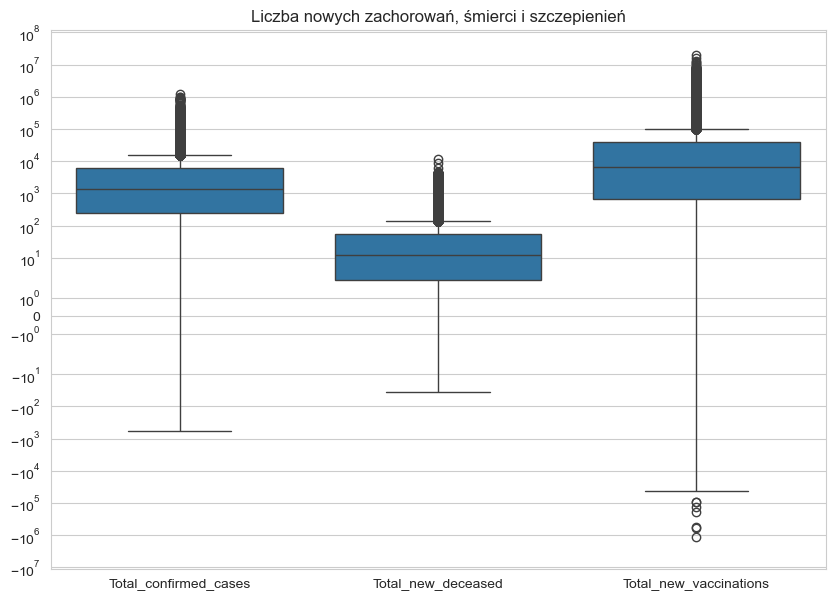

In [71]:
df_filtered = df_data.melt(
    value_vars=["Total_confirmed_cases", "Total_new_deceased", "Total_new_vaccinations"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 7))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.xlabel("")
plt.ylabel("")
plt.ylim(df_filtered["Cases"].min()-10000000, df_filtered["Cases"].max()+100000000)
plt.yscale("symlog")
plt.title("Liczba nowych zachorowań, śmierci i szczepienień")

plt.show()

Ujemnie wartości, szczególnie w przypadku śmierci i szczepień, wydają się bardzo dziwne. O ile przy zachorowaniach faktycznie mogło dochodzić do np. poprawiania błędnych danych z poprzedniego dnia, kiedy ktoś został źle zaklasyfikowany, tak w przypadku śmierci czy szczepień trudno sobie wyobrazić, że ludzie zmartwychwstawali albo się "odszczepiali".

### 1.4. Populacja i 1 dodatkowa kolumna

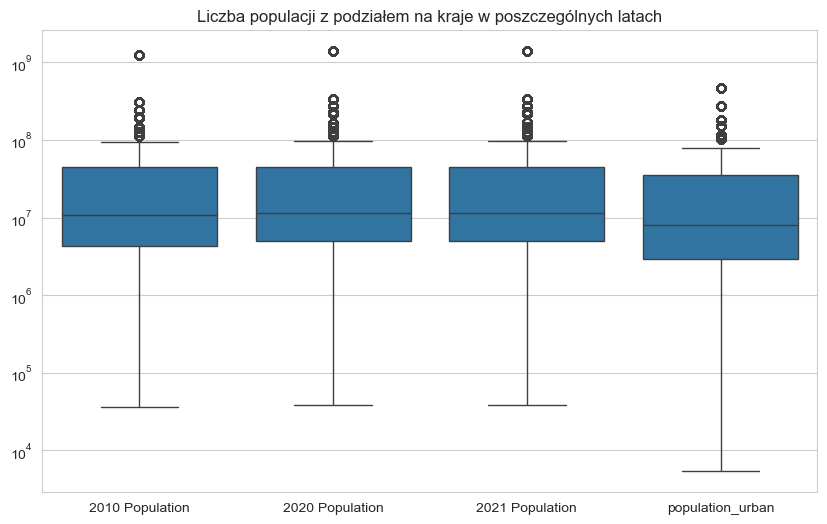

In [72]:
df_filtered = df_data.melt(
    value_vars=["2010 Population", "2020 Population", "2021 Population", "population_urban"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.xlabel("")
plt.ylabel("")
plt.yscale("log")
plt.title("Liczba populacji z podziałem na kraje w poszczególnych latach")

plt.show()

Populacja w miastach mniejsza niż całej ludzkości - zjawisko pożądane, brak potencjalnych wartości odstających do usunięica.

### 1.5. PKB

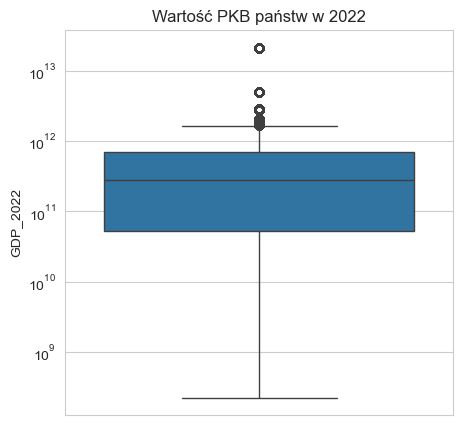

In [73]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_data, y="GDP_2022")
plt.yscale("log")
plt.title("Wartość PKB państw w 2022")

plt.show()

Wygląda realistycznie - największe PKB świata - w bilionach (10^13) ma USA, a za nimi plasują się Chiny. W tym przypadku również usuwanie wartości skrajnych nic by nam nie dało, a wręcz ucięło by nam część ważnych danych.

### 1.6.1. Trzy dodatkowe kolumny

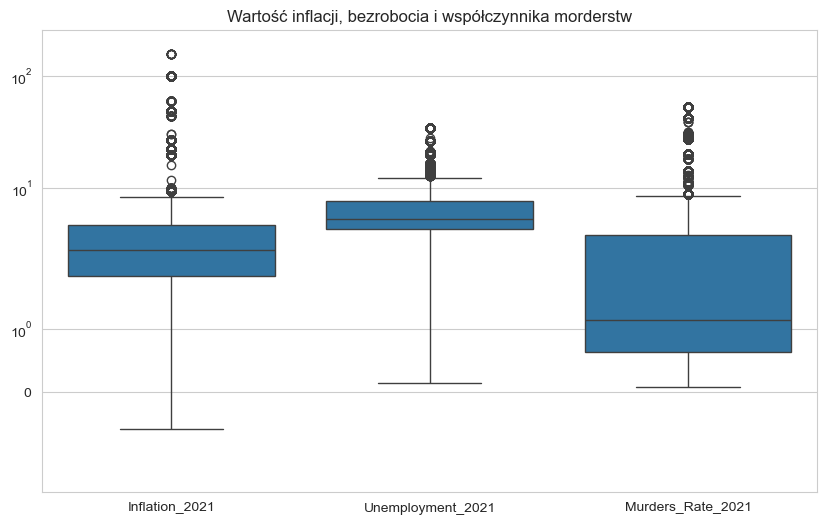

In [74]:
df_filtered = df_data.melt(
    value_vars=["Inflation_2021", "Unemployment_2021", "Murders_Rate_2021"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.yscale("symlog")
plt.xlabel("")
plt.ylabel("")
plt.ylim(df_filtered["Cases"].min()-1, df_filtered["Cases"].max()+100)
plt.title("Wartość inflacji, bezrobocia i współczynnika morderstw")

plt.show()

Zakres wartości oraz wartości odstające wyglądają na realne, w tym także ujemne wartości inflacji, czyli deflacja.
Crimerate jest wartością mocno różniącą się pomiędzy krajami, bezrobocie - niezbyt.
Żadna z powyższych wartości nie wymaga raczej usuwania outlierów - są to wskaźniki społeczne/ekonomiczne, więc mogą zawierać pojedyncze przypadki mocno odbiegające od pozostałych, a wszystkie wartości jakie widzimy wydają się być realne.

Co do inflacji, to w 2021 średnia roczna w 4 krajach była większa niż 100%: w Wenezueli(686%), w Sudanie(331%), w Libanie(150%) i Zimbabwe(143%)

### 1.6.2 Kolejne dodatkowe kolumny

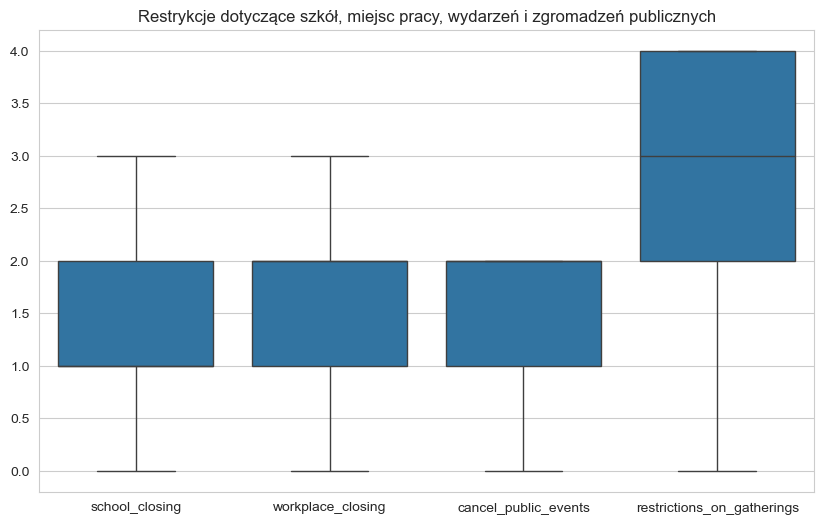

In [75]:
df_filtered = df_data.melt(
    value_vars=["school_closing", "workplace_closing", "cancel_public_events", "restrictions_on_gatherings"],
    var_name="Metric",
    value_name="Cases",
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="Metric", y="Cases")
plt.xlabel("")
plt.ylabel("")
plt.title("Restrykcje dotyczące szkół, miejsc pracy, wydarzeń i zgromadzeń publicznych")

plt.show()

Zgodnie z informacjami pozyskanymi w częśći 1. pierwsze dwa z tych parametrów przyjmują wartości liczb całkowitych z przedziału <0,3>, trzeci - <0,2>, a ostatni - <0,4>, co się zgadza.

### Część 3 (poziom podstawowy) - obliczenia statystyczne

### 3.0. Wybór 10 państw i zakresu dat

In [76]:
countries = ["Lithuania", "Slovakia", "Latvia", "Greece", "Hungary",
                      "Poland", "Croatia", "Bulgaria", "Russia", "Turkey"]

df_filtered = df_data[
    (df_data["Country_name"].isin(countries)) &
    (df_data["date"].str.startswith("2021-04"))]
display (df_filtered)
df_filtered.to_csv("out.csv")

,Country_name,3_letter_code,population_urban,gdp_per_capita_usd,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,New_persons_fully_vaccinated,...,Murders_Rate_2012,Murders_Rate_2013,Murders_Rate_2014,Murders_Rate_2015,Murders_Rate_2016,Murders_Rate_2017,Murders_Rate_2018,Murders_Rate_2019,Murders_Rate_2020,Murders_Rate_2021
703,Greece,GRC,8507474.0,20296.0,2.176665e+11,2021-04-01,3058,72,21730.0,17514.0,...,1.514096,1.401804,0.984998,0.860582,0.781414,0.804323,0.93104,0.737657,0.741993,0.852053
704,Greece,GRC,8507474.0,20296.0,2.176665e+11,2021-04-02,3229,70,21222.0,17228.0,...,1.514096,1.401804,0.984998,0.860582,0.781414,0.804323,0.93104,0.737657,0.741993,0.852053
705,Greece,GRC,8507474.0,20296.0,2.176665e+11,2021-04-03,1955,78,35835.0,17025.0,...,1.514096,1.401804,0.984998,0.860582,0.781414,0.804323,0.93104,0.737657,0.741993,0.852053
706,Greece,GRC,8507474.0,20296.0,2.176665e+11,2021-04-05,4293,79,51262.0,4746.0,...,1.514096,1.401804,0.984998,0.860582,0.781414,0.804323,0.93104,0.737657,0.741993,0.852053
707,Greece,GRC,8507474.0,20296.0,2.176665e+11,2021-04-06,3445,75,47256.0,12713.0,...,1.514096,1.401804,0.984998,0.860582,0.781414,0.804323,0.93104,0.737657,0.741993,0.852053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31047,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2021-04-26,37312,353,115723.0,148099.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599
31048,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2021-04-27,43301,346,95330.0,188346.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599
31049,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2021-04-28,40444,341,129773.0,324569.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599
31050,Turkey,TUR,63097818.0,9042.0,7.414791e+11,2021-04-29,37674,339,133588.0,301781.0,...,4.272196,NaN,NaN,2.806161,3.337472,3.095390,2.60961,2.419692,2.505484,2.519599


3.0.1. Dobór państw - wybraliśmy 10 europejskich państw (podobny region geograficzny, kulturowy) z PKB per capita najbardziej zbliżonym do Polski w roku 2021. (źródło - Międzynarodowy Fundusz Walutowy). Co prawda zamiast Turcji powinna być Rumunia, ale nie zbierała ona danych dotyczących liczby przeprowadzanych testów, a jest to jeden z głónych aspektów tego zadania, dlatego nie analizujemy danych z tego kraju.

3.0.2. Dobór daty - kwiecień 2021 to pierwszy okres po tym jak wirus Covid-19 przedostał się do Europy. Dlatego pamiętajmy, że nasze wykresy będą przede wszystkim pokazywały jak władze i społeczeństwa poszczególnych państw radziły sobie w pierwszym momencie pandemii.

3.0.3. Dane z Rosji - jako państwa autorytarnego i odnoszącego się niezbyt przychylnie do Zachodu i organizacji międzynarodowych można traktować z lekką dozą dystansu.

3.0.4. Dane dla Grecji pochodzą z 20 dni. Reszta państw posiada zbiory z ok. 24-30 dni.

3.0.5. Dane, które będziemy analizować w kolejnych punktach mocno są związane z liczbą ludności danego państwa, dlatego zanim przejdziemy do części właściwej warto zobrazować z jakim zróżnicowaniem tej wartości mamy do czynienia:

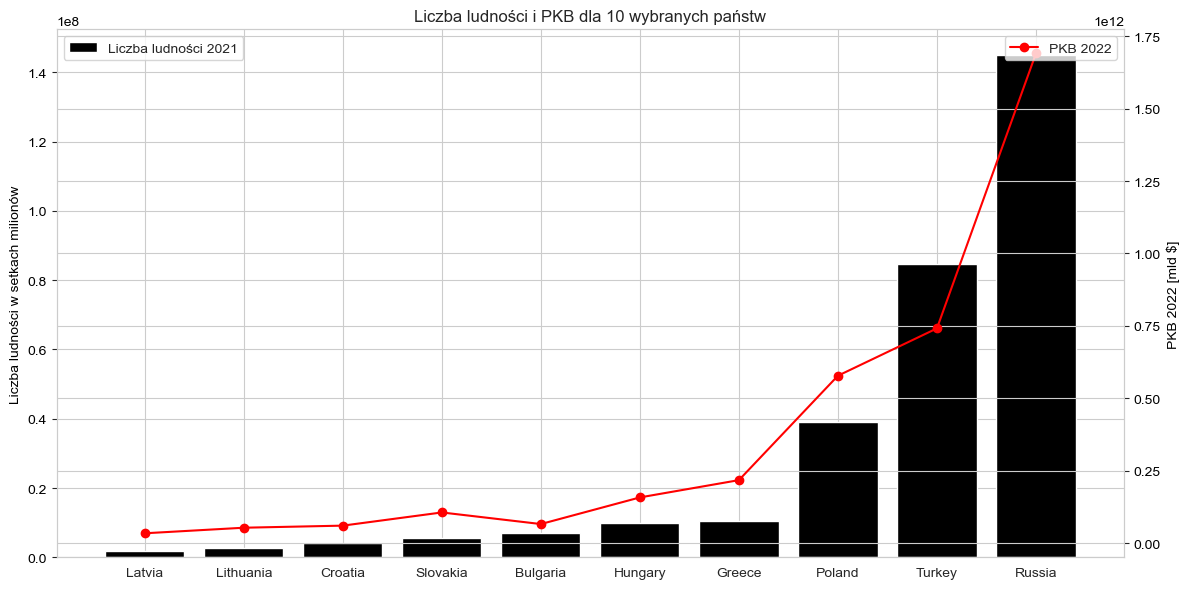

In [87]:
population = df_filtered.groupby("Country_name")["2021 Population"].first().sort_values()
gdp = df_filtered.groupby("Country_name")["GDP_2022"].first().loc[population.index]
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(population.index, population, color="black", label="Liczba ludności 2021")
ax1.set_ylabel("Liczba ludności w setkach milionów", color="black")
ax1.tick_params(axis="y", labelcolor="black")

ax2 = ax1.twinx()
ax2.plot(population.index, gdp, color="red", marker="o", label="PKB 2022")
ax2.set_ylabel("PKB 2022 [mld $]", color="black")
ax2.tick_params(axis="y", labelcolor="black")

plt.title("Liczba ludności i PKB dla 10 wybranych państw")
ax1.set_xlabel("")
plt.xticks(rotation=45, ha="right")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

- Liczba ludności Polski, Turcji i Rosji zdecydowanie odstaje od wartości dla pozostałych państw. Jednocześnie te trzy państwa także mocno się różnią w stosunku ok. 1:2:3. Dlatego też jeżeli będziemy analizować liczby bezwzglene, to trzeba mieć na uwadze powyższe dysproporcje.
- Z kolei pod względem PKB Polska jest dużo bliżej Turcji niż pod względem ludności, z kolei Bułgaria pomimo dużej liczebności PKB ma zbliżone do tego Łotwy i Litwy.
- Teoretycznie państwa o lepszym stosunku PKB do liczby ludności powinny radziś sobie lepiej (czyli 3 najgorsze to Turcja, Rosja, Bułgaria)
### 3.1. Średnia liczba zachorowań, śmierci i szczepień

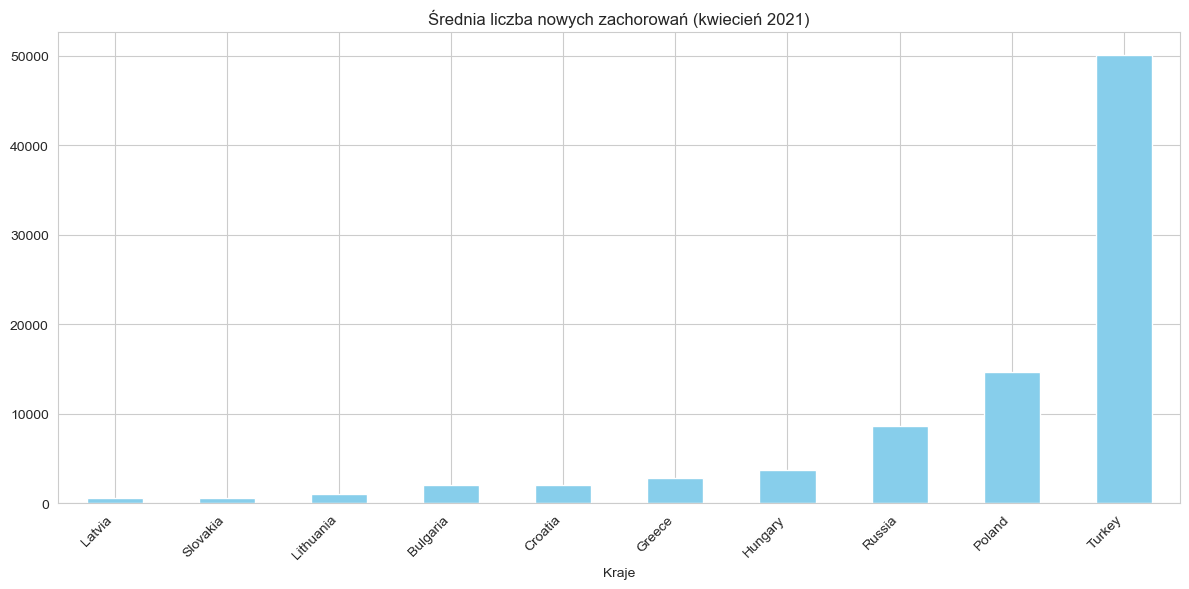

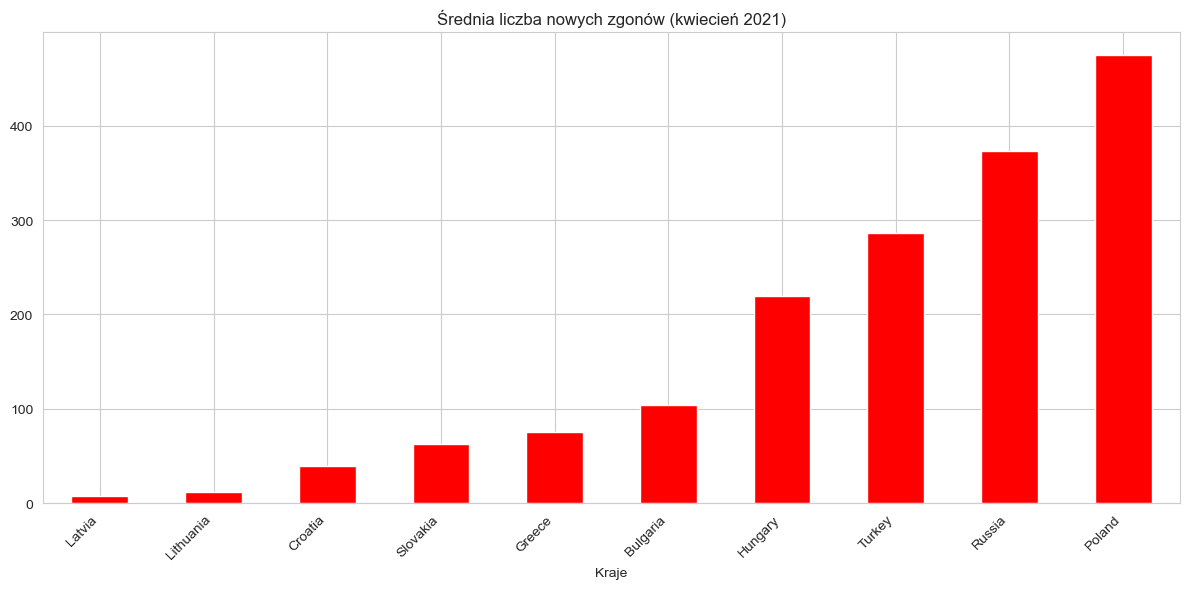

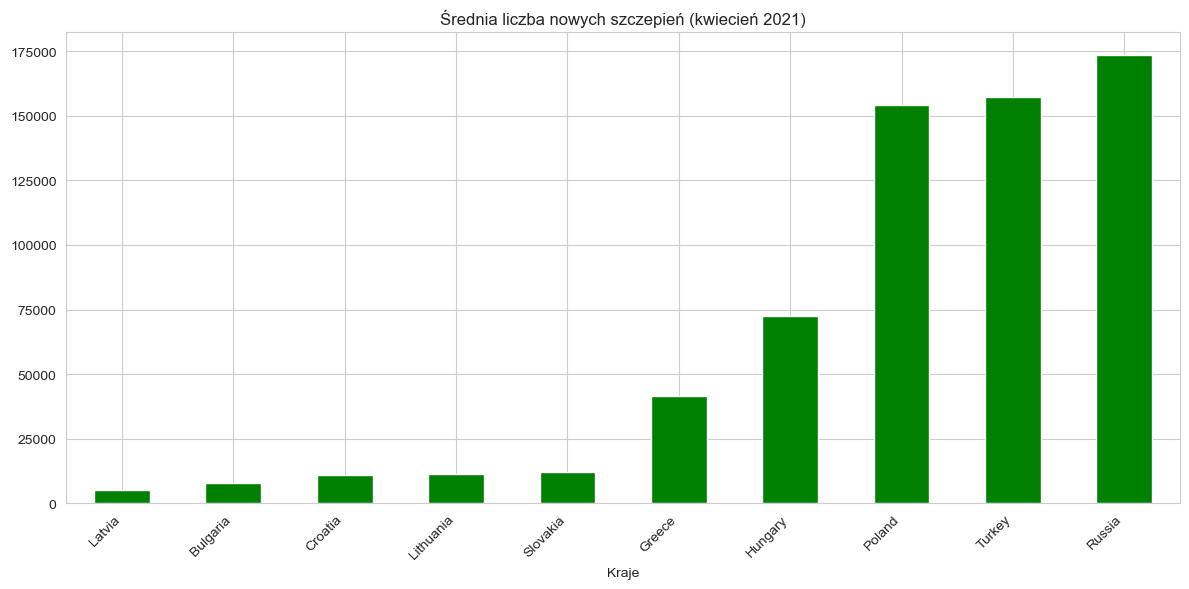

In [78]:
# 3.1.1. Średnia liczba nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].mean().sort_values()
plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue")
plt.title("Średnia liczba nowych zachorowań (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.1.2. Średnia liczba nowych zgonów
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].mean().sort_values()
plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", color="red")
plt.title("Średnia liczba nowych zgonów (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.1.3. Średnia liczba nowych szczepień
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].mean().sort_values()
plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", color="green")
plt.title("Średnia liczba nowych szczepień (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

1. Jak widać w przypadku liczb bewzględnych można powiedzieć, że grupa 3 najludniejszych krajów dominuje w statystykach, a te najmniej liczne - zajmują ostatnie pozycje. Co prawda patrząc po liczbie ludności można by było spodziewać się dużo większej liczby zachorowań w tym państwie, ale po pierwsze największe miasta w tym państwie (Petersburg, Moskwa) leżą dosyć daleko od reszty kontynentu, a po drugiej jest to kraj z jedną z najniższych gęstości zaludnienia na świecie.
2. Na wykresie nr 1 widać, że liczba nowych zachorowań w Turcji zdecydowanie odbiegała od pozostalych państw - być może jest to zwiazane z częściowym położeniem tego państwa na terenie Azji i bliższymi związkami kulturowo-gospodarczymi z innymi państwami Azji.
3. Niepokojący może być dla nas wykres nr 2 - Polska zajmuje niechlubne 1. miejsce pomimo posiadania nienajwiększej liczby ludności. Pozostałymi państwami, w których było najwięcej zgonów to Rosja, Turcja i Węgry.
4. Najwięcej szczepień przeprowadzono w najliczniejszych państwach - logiczne.


### 3.2. Średnia różnica dziennych zachorowań, śmierci i szczepień
czyli jak bardzo zmieniała się dzienna liczba przypadków w czasie?

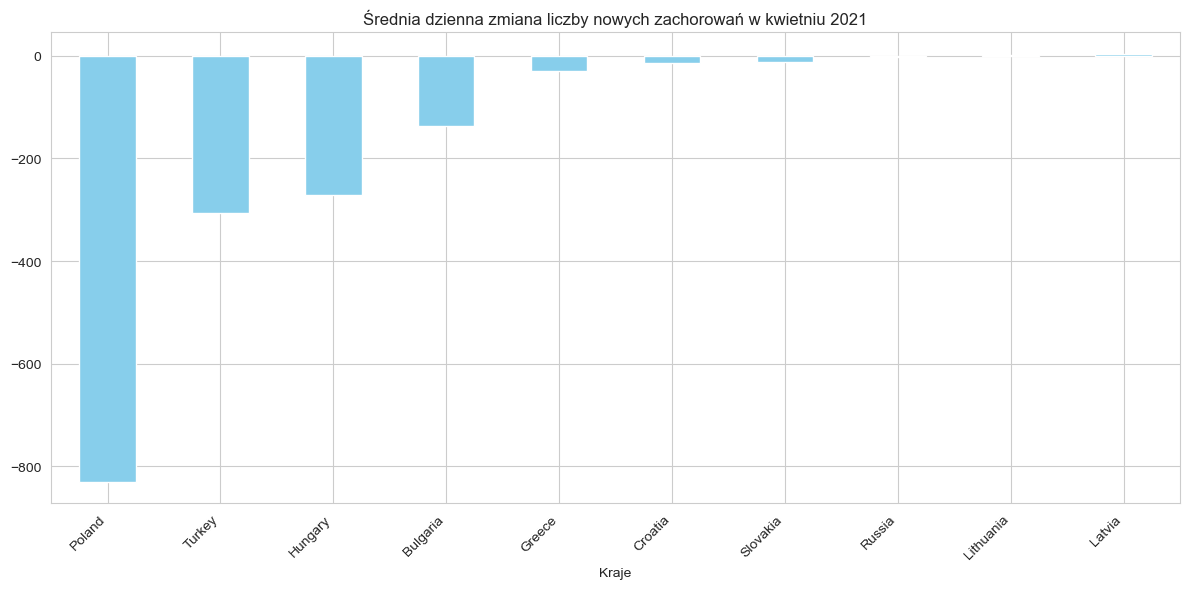

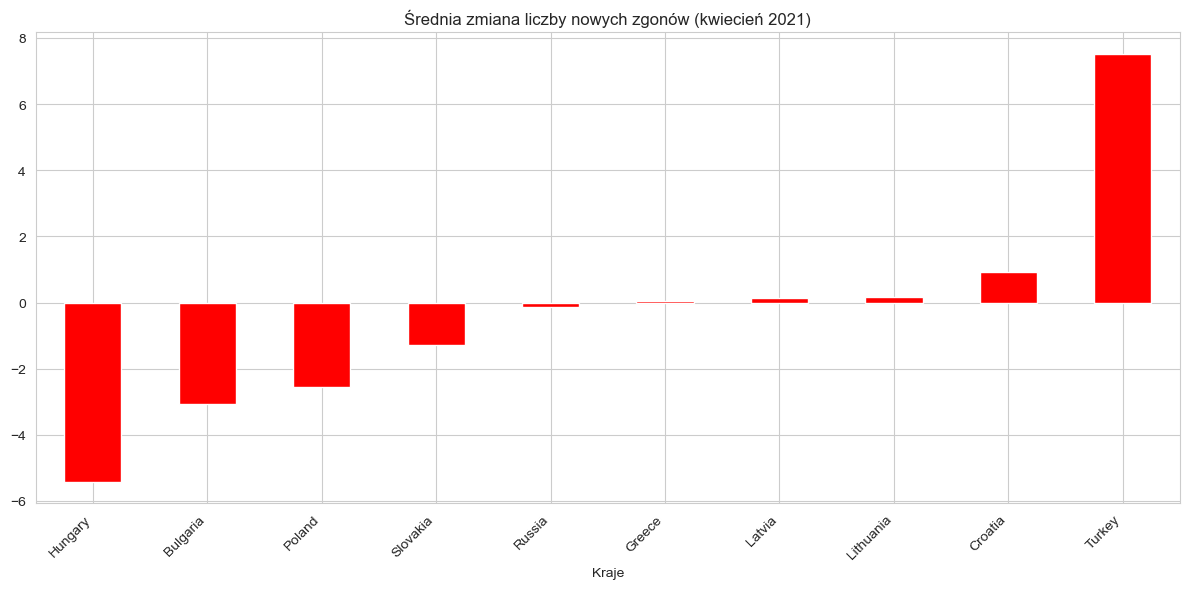

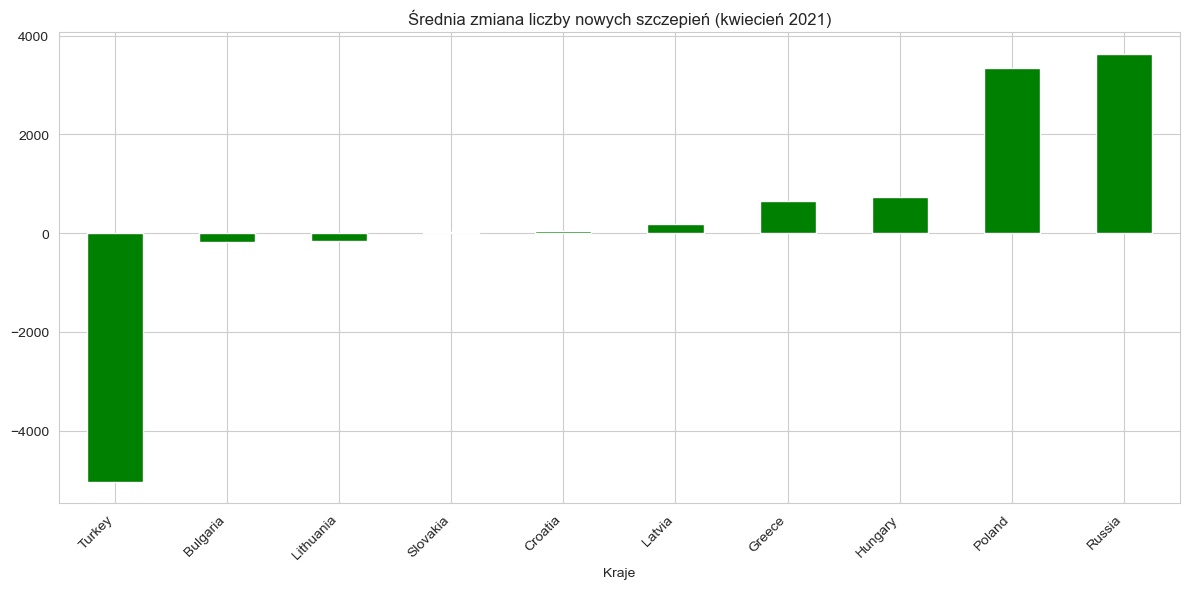

In [79]:
# 3.2.1. Średnia różnica nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].diff().groupby(df_filtered["Country_name"]).mean().sort_values()
plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue")
plt.title("Średnia dzienna zmiana liczby nowych zachorowań w kwietniu 2021")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Kraje")
plt.tight_layout()
plt.show()

# 3.2.2. Średnia różnica dziennych śmierci
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].diff().groupby(df_filtered["Country_name"]).mean().sort_values()
plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", color="red")
plt.title("Średnia zmiana liczby nowych zgonów (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.2.3. Średnia różnica dziennych testów
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].diff().groupby(df_filtered["Country_name"]).mean().sort_values()
plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", color="green")
plt.title("Średnia zmiana liczby nowych szczepień (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

1. Zachorowania - w większości państw tendencja spadkowa, co sugeruje, że np. szybko wprowadzono mocno obostrzenia (lockdown).
- Szczególnie w Polsce liczba zachorowań pomiędzy początkiem a końcem kwietnia spadła szczególnie mocno, podobny trend widać również m.in. w Turcji, na Węgrzech i w Bułgarii.
- W takich krajach jak w Rosji, Chorwacji, Litwie, Łotwie i Słowacji liczba zachorowań utrzymywała się na podobnym poziomie w skali miesiąca.
2. Śmierci - we wszystkich krajach oprócz Turji i Chorwacji tendencja bliska zeru lub spadkowa, co oznacza, biorąc pod uwagę także wykresy z wcześniejszego podpunktu że:
- w Polsce, Rosji, Bułgarii i na Węgrzech liczba śmierci była największa na początku miesiąca, a potem wzglednie spadała.
- W Turcji było odwrotnie (dużo na koniec kwietnia).
- W pozostałych państwach liczba zgonów była na względnie stałym poziomie.
3. Szczepienia - we wszystkich krajach oprócz Turcji tendencja wzrostowa, co oznacza, że:
- Turcja szczepiła bardzo dużo osób na początku kwietnia (patrz wcześniejszy wykres), a potem ta tendencja spadła, co jest lekko dziwne, co nie zapobiegło bardzo dużej śmiertelności w 2. części miesiaca.
- Polska i Rosja szczepiły z każdym dniem coraz więcej osób, co nie dziwi biorąc pod uwagę liczbę ludności tych państw. Do tego grona można też zaliczyć Grecję i Węgry.
- Pozostałe pańśtwa utrzymywały względnie stałą liczbę szczepień.

### 3.3. Mediana nowych zachorowań, śmierci i szczepień

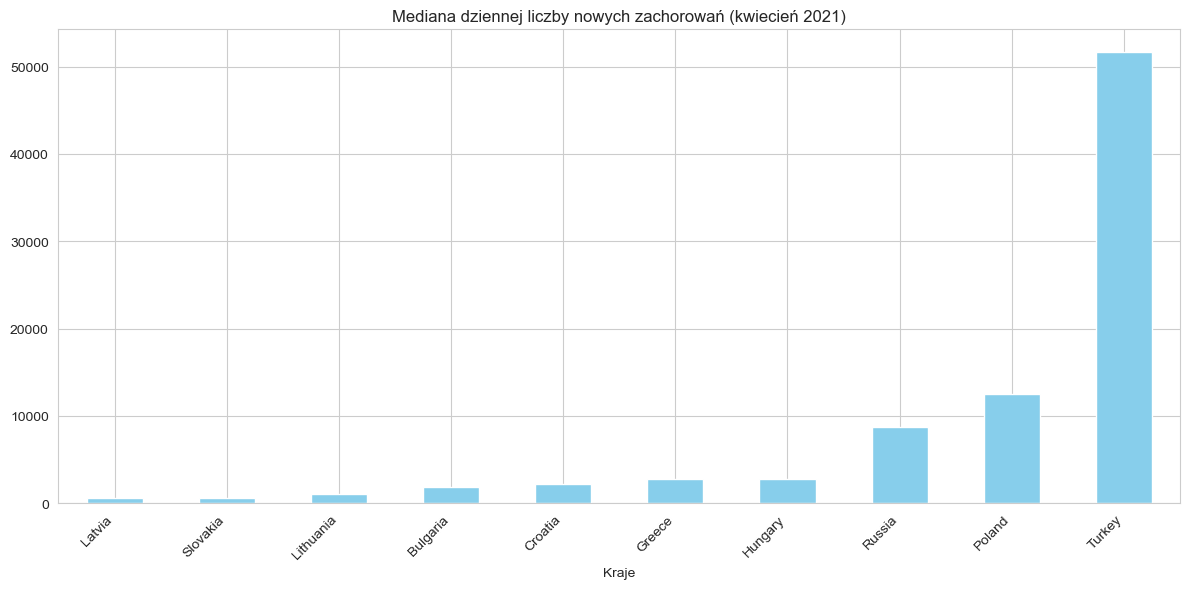

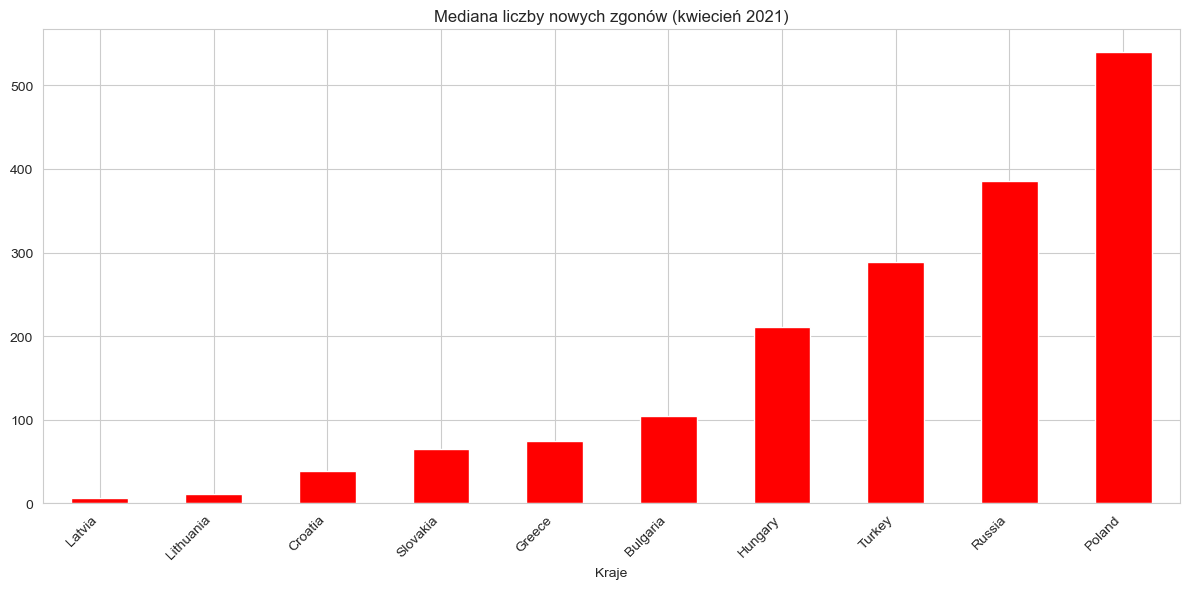

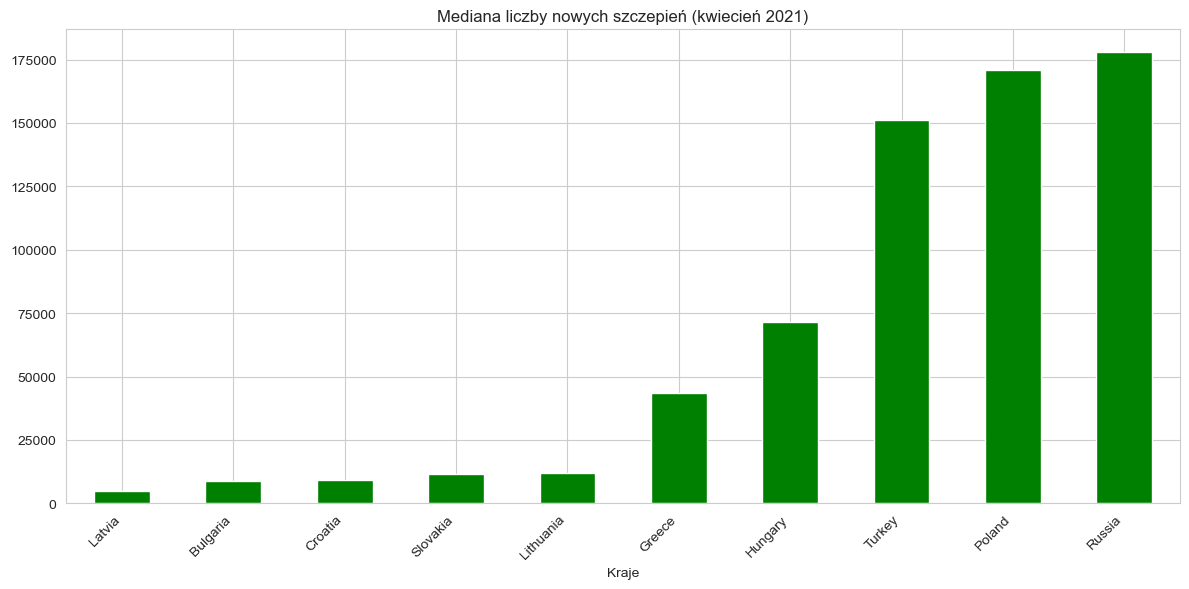

In [80]:
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].median().sort_values()
plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue", figsize=(12, 6))
plt.title("Mediana dziennej liczby nowych zachorowań (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Kraje")
plt.tight_layout()
plt.show()

deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].median().sort_values()
plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", color="red")
plt.title("Mediana liczby nowych zgonów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Kraje")
plt.tight_layout()
plt.show()

vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].median().sort_values()
plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", color="green")
plt.title("Mediana liczby nowych szczepień (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Kraje")
plt.tight_layout()
plt.show()


1. Mediana nowych zachorowań potwierdza wcześniejsza obserwacje - Turcja znacząco odstaje od reszty państw, a wyniki (liczby bezwzględne) są mocno związane z liczbą ludnosci danych państw.
2. Mediana nowych śmierci potwierdza wcześniejsze obserwacje - Polska niechlubnie odstaje od reszty pańśtw, a wyniki (liczby bezwzględne) są mocno związane z liczbą ludnosci danych państw.
3. Mediana nowych szczepień potwierdza wcześniejsza obserwacje, że to najbardziej ludne państwa przeprowadzały najwięcej szczepień.
### 3.4. Odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla 10 wybranych krajów.

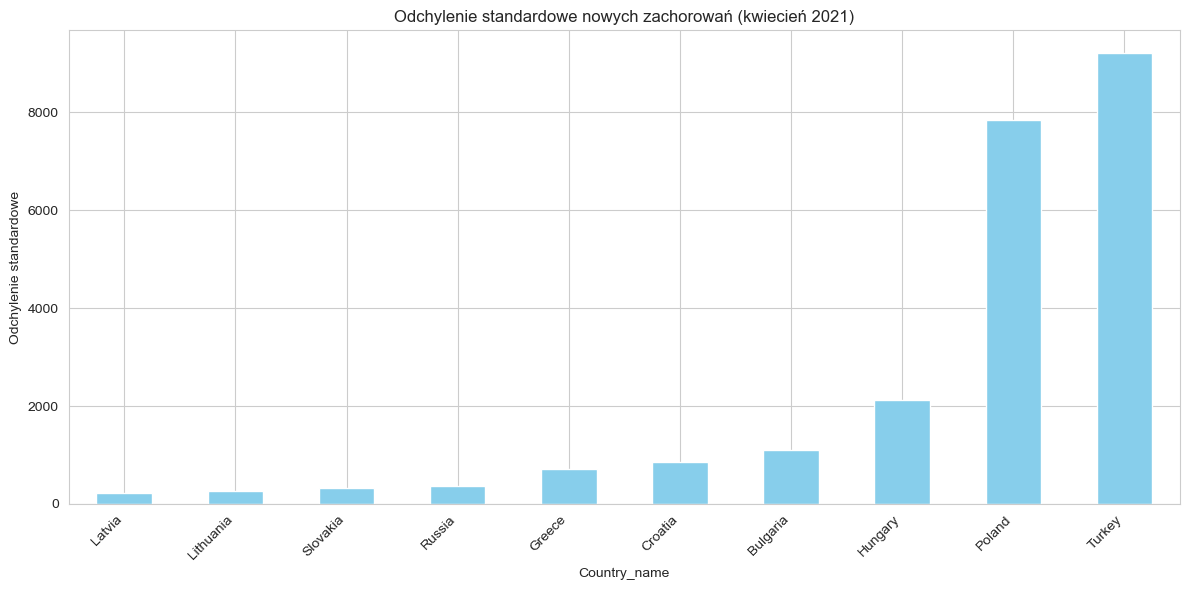

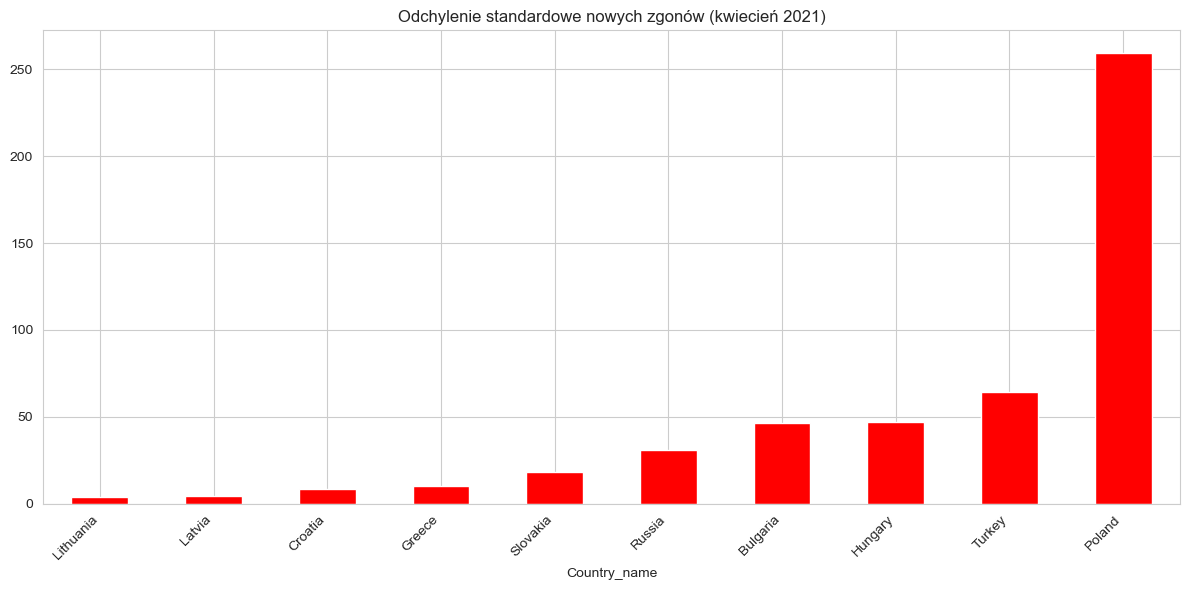

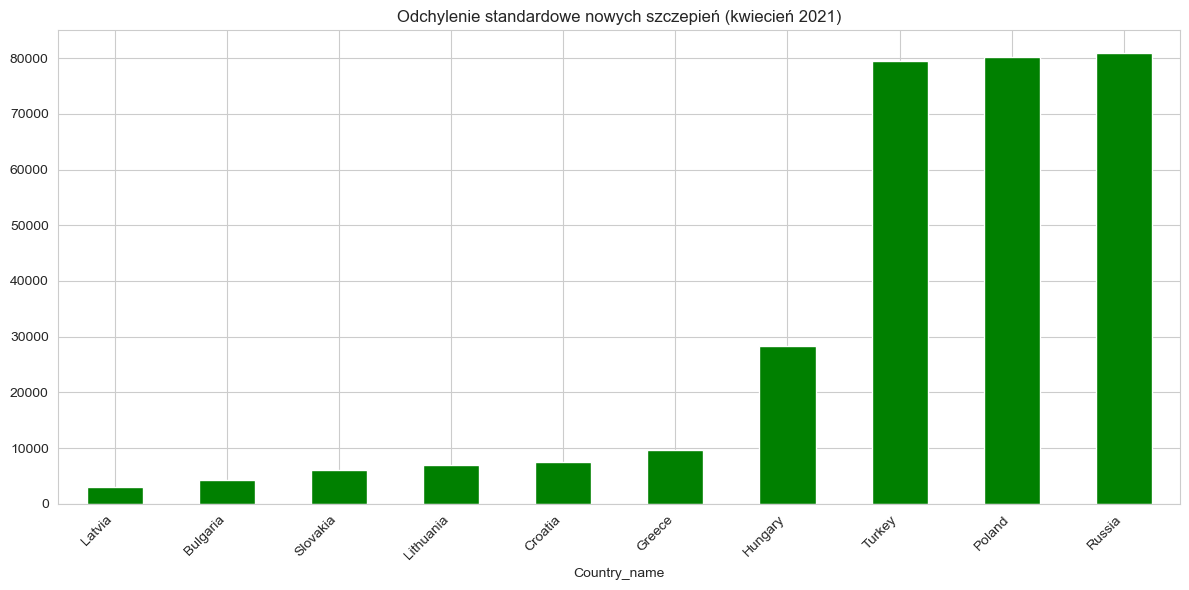

In [81]:
# 3.4.1. Odchylenie standardowe nowych zachorowań
confirmed = df_filtered.groupby("Country_name")["Total_confirmed_cases"].std().sort_values()
plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue", figsize=(12, 6))
plt.title("Odchylenie standardowe nowych zachorowań (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Odchylenie standardowe")
plt.tight_layout()
plt.show()

# 3.4.2. Odchylenie standardowe nowych zgonów
deceased = df_filtered.groupby("Country_name")["Total_new_deceased"].std().sort_values()
plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", color="red")
plt.title("Odchylenie standardowe nowych zgonów (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.4.3. Odchylenie standardowe nowych szczepień
vaccinations = df_filtered.groupby("Country_name")["Total_new_vaccinations"].std().sort_values()
plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", color="green")
plt.title("Odchylenie standardowe nowych szczepień (kwiecień 2021)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

1. W przypadku nowych zachorowań widać duży "rozstrzał" wartości dla Polski i Turcji.
2. W przypadku nowych śmierci widać duży rozsztrzał wartośći dla Polski, co w połączeniu z wykresem z średnią dzienną zmianą liczby nowych śmierci, pozwala stwierdzić że początek kwietnia był w Polsce dużo bardziej śmiertelny niż jego końcówka.
3. W przypadku liczby nowych szczepień widzimy, że szczególnie na Rosji, Polski i Turcja różnice pomiędzy szczepieniami w poszczególnych dniach były duże, co w połaczeniu z wykresem zmiany średniej dziennej liczby szczepień pozwala stwierdzić że w Rosji i Polsce szczepiono coraz więcej ludzi, a w Turcji prawdopodobnie coraz mniej niż na początku kwietnia.

### 3.5. Minimalna, średnia i maksymalna liczba nowych zachorowań, śmierci i szczepień, a PKB wybranych krajów

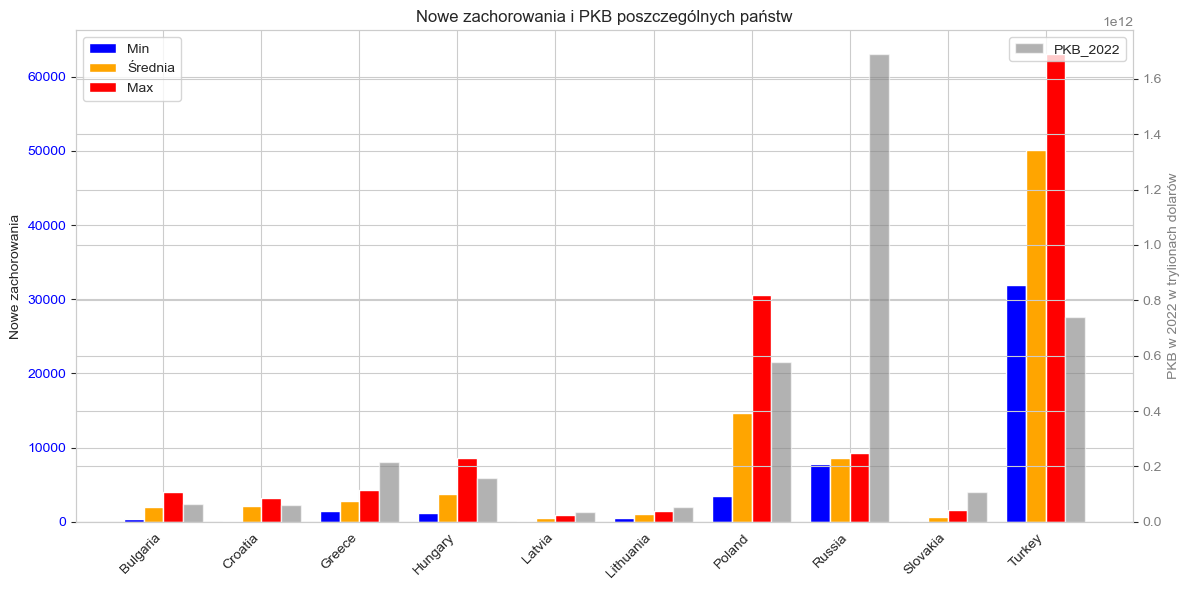

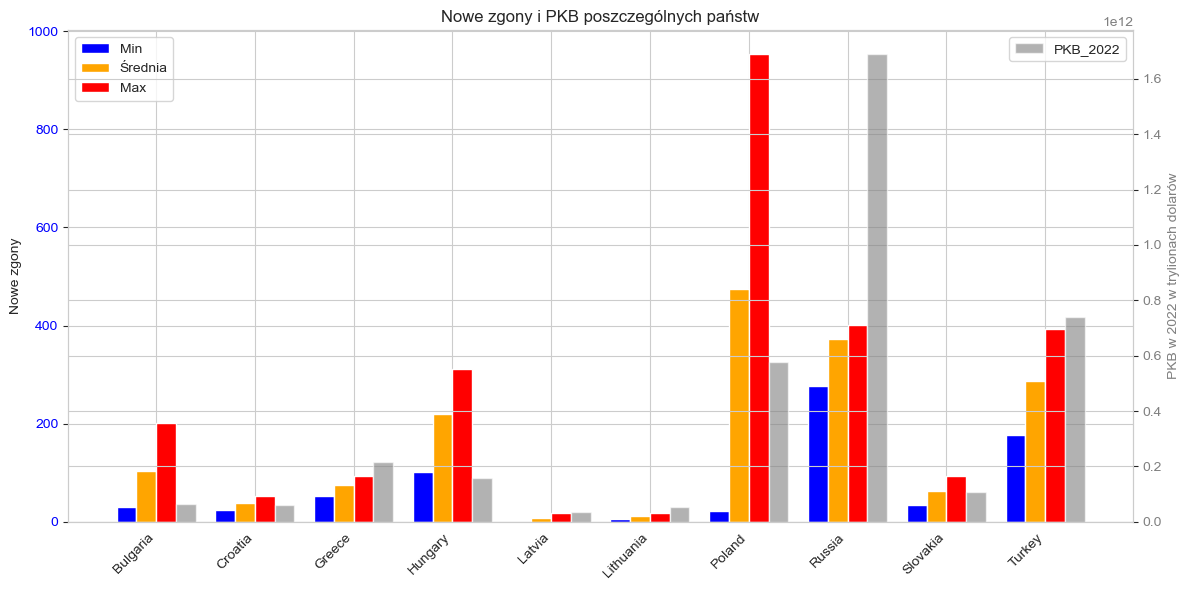

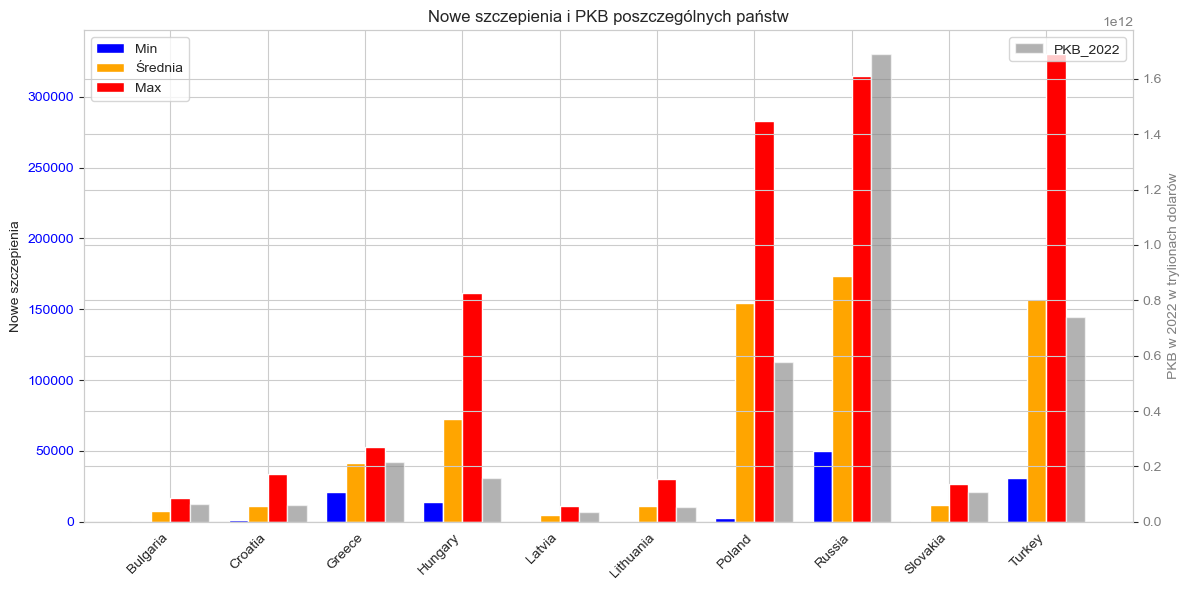

In [82]:
# Obliczenie statystyk dla nowych przypadków, zgonów i szczepień
summary_stats = df_filtered.groupby("Country_name").agg({
    "Total_confirmed_cases": ["min", "mean", "max"],
    "Total_new_deceased": ["min", "mean", "max"],
    "Total_new_vaccinations": ["min", "mean", "max"],
    "GDP_2022": "first"
})

metrics = ["Total_confirmed_cases", "Total_new_deceased", "Total_new_vaccinations"]
titles = ["Nowe zachorowania", "Nowe zgony", "Nowe szczepienia"]
stat_labels = ["Min", "Mean", "Max"]
colors = ["blue", "orange", "red", "gray"]
width = 0.2

for i, metric in enumerate(metrics):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    countries = summary_stats.index

    metric_min = summary_stats[(metric, "min")]
    metric_mean = summary_stats[(metric, "mean")]
    metric_max = summary_stats[(metric, "max")]
    gdp_values = summary_stats[("GDP_2022", "first")]

    x = np.arange(len(countries))
    ax1.bar(x - 1.5 * width, metric_min, width=width, label="Min", color=colors[0])
    ax1.bar(x - 0.5 * width, metric_mean, width=width, label="Średnia", color=colors[1])
    ax1.bar(x + 0.5 * width, metric_max, width=width, label="Max", color=colors[2])
    ax2 = ax1.twinx()
    ax2.bar(x + 1.5 * width, gdp_values, width=width, label="PKB_2022", color=colors[3], alpha=0.6)

    ax1.set_ylabel(titles[i])
    ax1.tick_params(axis='y', labelcolor="blue")
    ax2.set_ylabel("PKB w 2022 w trylionach dolarów", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray", )

    ax1.set_xticks(x)
    ax1.set_xticklabels(countries, rotation=45, ha="right")
    ax1.set_title(f"{titles[i]} i PKB poszczególnych państw")

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

0. Skala:
- liniowa bo wartości zachorowań/śmierci/szczepień są różnicy 0-60000/1000/300000 a PKB/Populacji 0,1-1,7.

1. Zachorowania:
- Turcję, Polskę Węgry i Bułgarięmożemy określić państwami, w których liczba zachorowań była duża w stosunku do PKB.
- Rosja ma stosunkowo mało nowych zachorowań jak na swoje PKB, jest to prawdopodobnie związane z wspomnianą już gęstością zaludnienia tego państwa.
- Pozytywnie można wyróżnić Grecję, Litwę, Łotwę i Słowację, gdzie nawet maksymalna liczba zachorowań jest niska względem słupka  PKB.
2. Śmierci:
- Tutaj widzimy zmianę na fotelu lidera, Bułgaria ma bardzo tragiczny stosunek zgonów do GPD, z kolei Turcja jak chodzi o śmiertelność to nie poradziła sobie aż tak źle jak mogłoby się wydawać z zachorowań - gorsza od niej jest choćby Polska, Węgry(oba bardzo złe wyniki), Chorwacja czy - o dziwo - Słowacja.
- Dodatkowo dla Polski i Bułgarii możemy wyróżnić bardzo dużą różnicę pomiędzy najmniejszą i największą liczbą zgonów.
3. Szczepienia:
- Widzimy bardzo dużą liczbę szczepień w porównaniu z PKB na Węgrzech, Litwie, Chorwacji, Polsce, Turcji i Grecji (w tych państwach średnia liczba dziennych szczepień przewyższa lub dorównuje słupkowi PKB).
- Tylko dla Rosji liczba maksymalna szczepień nie przebiła słupka z PKB, a we wszystkich innych pańśtwach - tak, a dodatkowo średnia w większości z nich także przekroczyła lub przynajmniej zrównała się z tym słupkiem.
- We wszystkich państwach widać dużą różnicę pomiędzy minimalną i maksymalną liczbą szczepień.

### 3.6. Minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja 10 wybranych krajów.

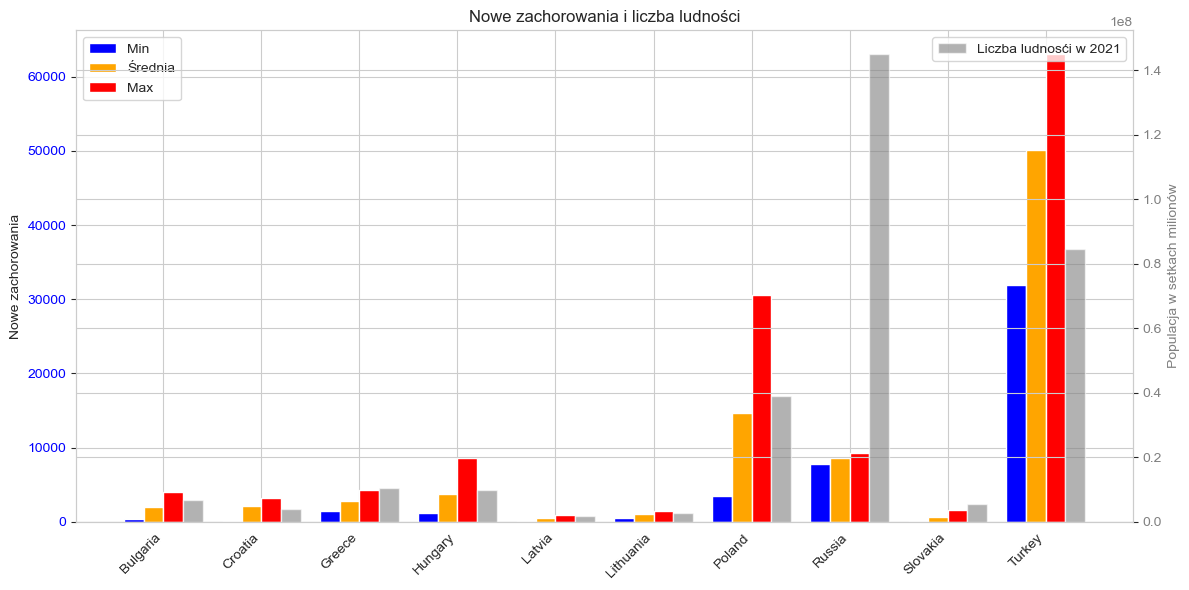

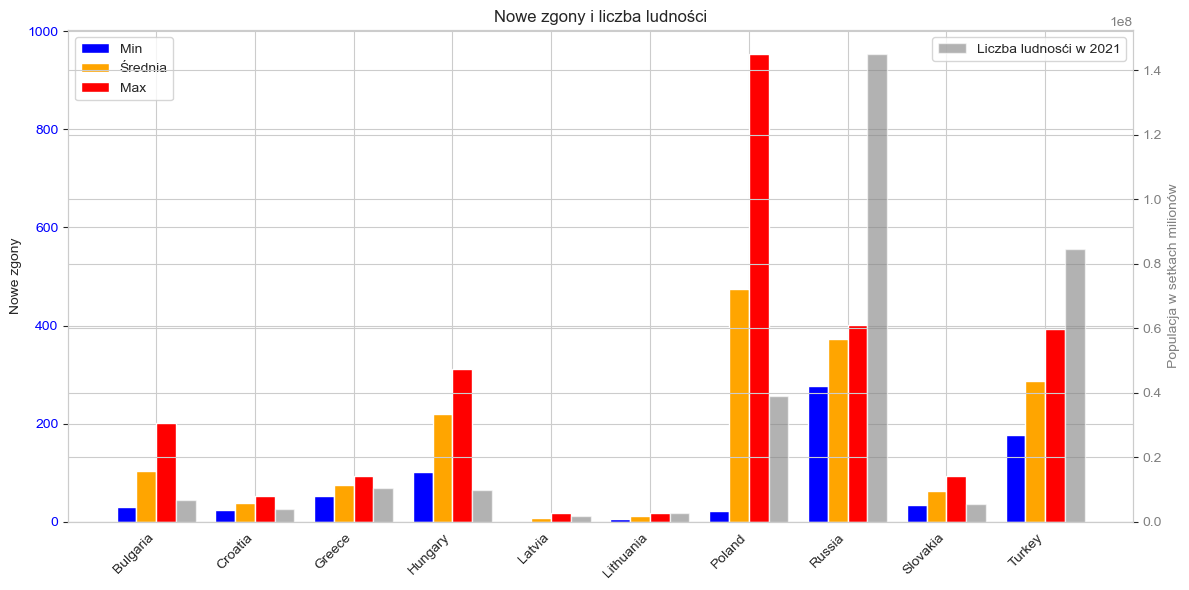

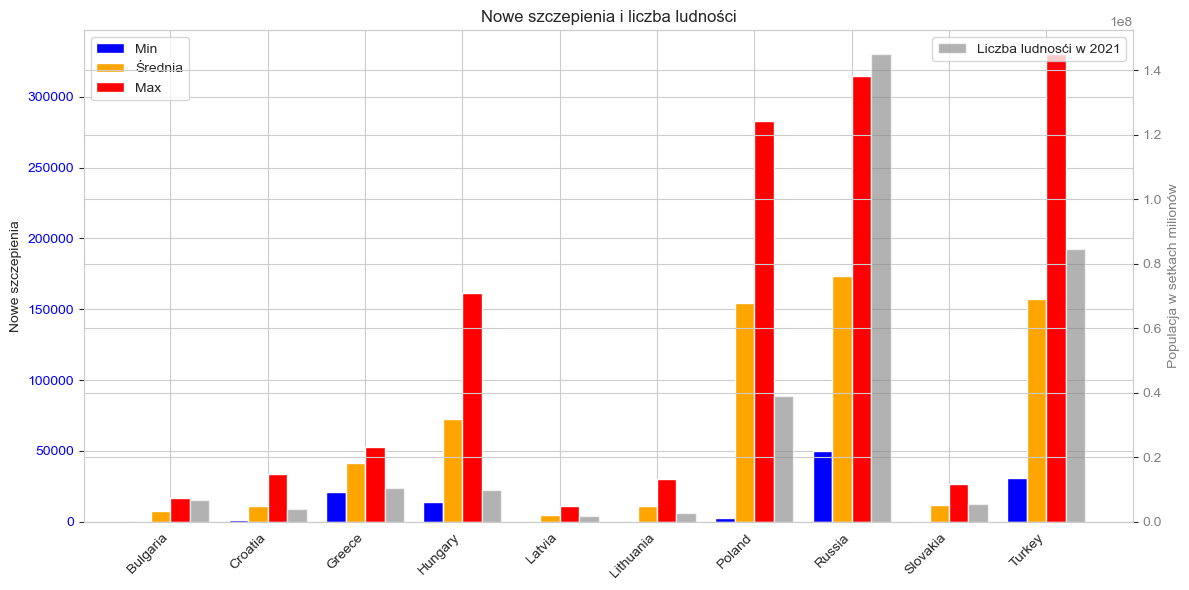

In [83]:
# Obliczenie statystyk dla nowych przypadków, zgonów i szczepień
summary_stats = df_filtered.groupby("Country_name").agg({
    "Total_confirmed_cases": ["min", "mean", "max"],
    "Total_new_deceased": ["min", "mean", "max"],
    "Total_new_vaccinations": ["min", "mean", "max"],
    "2021 Population": "first"
})

metrics = ["Total_confirmed_cases", "Total_new_deceased", "Total_new_vaccinations"]
titles = ["Nowe zachorowania", "Nowe zgony", "Nowe szczepienia"]
stat_labels = ["Min", "Mean", "Max"]
colors = ["blue", "orange", "red", "gray"]
width = 0.2

for i, metric in enumerate(metrics):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    countries = summary_stats.index

    metric_min = summary_stats[(metric, "min")]
    metric_mean = summary_stats[(metric, "mean")]
    metric_max = summary_stats[(metric, "max")]
    population_values = summary_stats[("2021 Population", "first")]

    x = np.arange(len(countries))
    ax1.bar(x - 1.5 * width, metric_min, width=width, label="Min", color=colors[0])
    ax1.bar(x - 0.5 * width, metric_mean, width=width, label="Średnia", color=colors[1])
    ax1.bar(x + 0.5 * width, metric_max, width=width, label="Max", color=colors[2])
    ax2 = ax1.twinx()
    ax2.bar(x + 1.5 * width, population_values, width=width, label="Liczba ludnosći w 2021", color=colors[3], alpha=0.6)

    ax1.set_ylabel(titles[i])
    ax1.tick_params(axis='y', labelcolor="blue")
    ax2.set_ylabel("Populacja w setkach milionów", color="gray")
    ax2.tick_params(axis='y', labelcolor="gray")

    ax1.set_xticks(x)
    ax1.set_xticklabels(countries, rotation=45, ha="right")
    ax1.set_title(f"{titles[i]} i liczba ludności")

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

1. Nowe zachorowania:
- Podobnie jak przy PKB - Turcja bardzo dużo Polska, Węgry i Bułgaria też dużo.
2. Nowe śmierci:
- Podobnie jak przy PKB - Węgry, Bułgaria i Polska najgorzej.
3. Nowe zaszczepienia:
- Widzimy bardzo dużą liczbę szczepień w porównaniu z liczbą ludności na Węgrzech, Litwie, Chorwacji, Polsce, Turcji i Grecji.
- Rosja znowu najgorzej.

### Wnioski końcowe:
- Turcja spełniła założenie początkowe, że kraj o najgorszym PKB per capita będzie miał najgorsze wyniki pod względem zachorowań/śmierci, jednocześnie jednak w tym kraju przeprowadzano dużó szczepień, więc nie można go aż tak potępiać.
- Polska wygląda na prowadzącą pod względem śmierci, co biorąc pod uwagę tylko PKB per capita byłoby bardzo dziwne.
- Rosja pod wszystkimi 3 względami radziła sobie zadzwiająco dobrze jak na słaby stosunek PKB do liczby ludności, prawdopodobnie jednym z czynników może być bardzo mała gęstość zaludnienia tego kraju w porównaniu do pozostalych.
- Takie kraje jak Bułgaria, która pod wzgledem PKB per capita wyglądała dosyć słabo również znajduje się w czołówce najgorszych wyników.
- Krajami, ktore w analizowanym okresie radziły sobie względnie dobrze (albo lepiej od reszty) można by nazwać Słowację, Litwę i Łotwę.

### Część 4 (poziom podstawowy) - normalizacja danych

4.1.-4.3. Normalizacja

C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\215175301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cases_per_1000"] = (df_filtered["Total_confirmed_cases"] / df_filtered["2021 Population"]) * 1000
C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\215175301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Vaccinations_per_1000"] = (df_filtered["Total_new_vaccinations"] / df_filtered["2021 Population"]) * 1000
C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\215175301.p

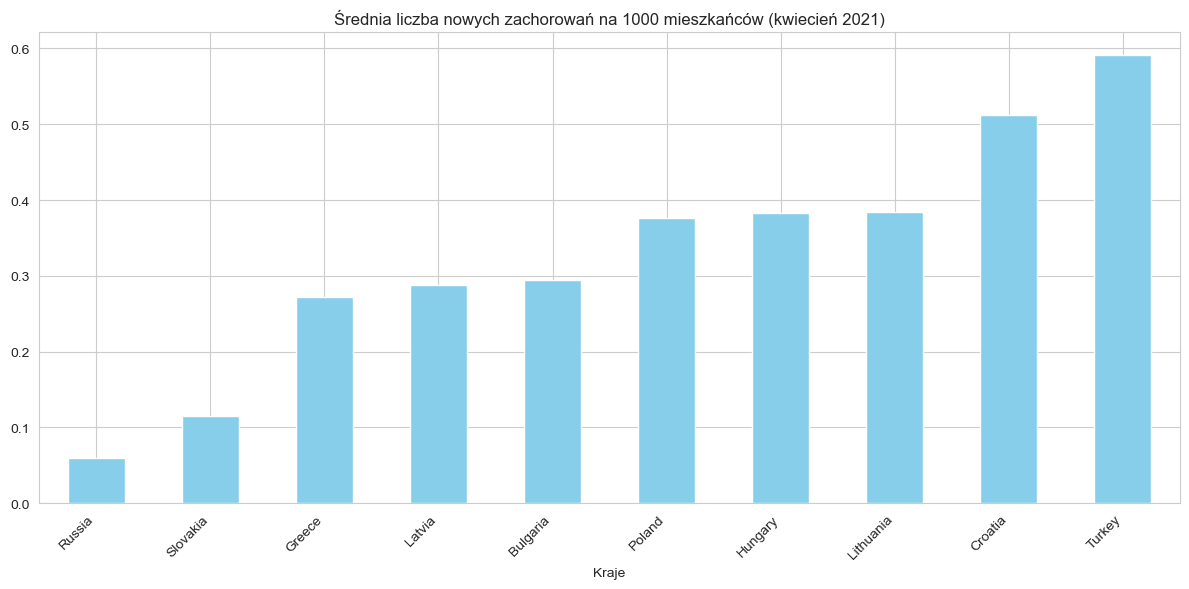

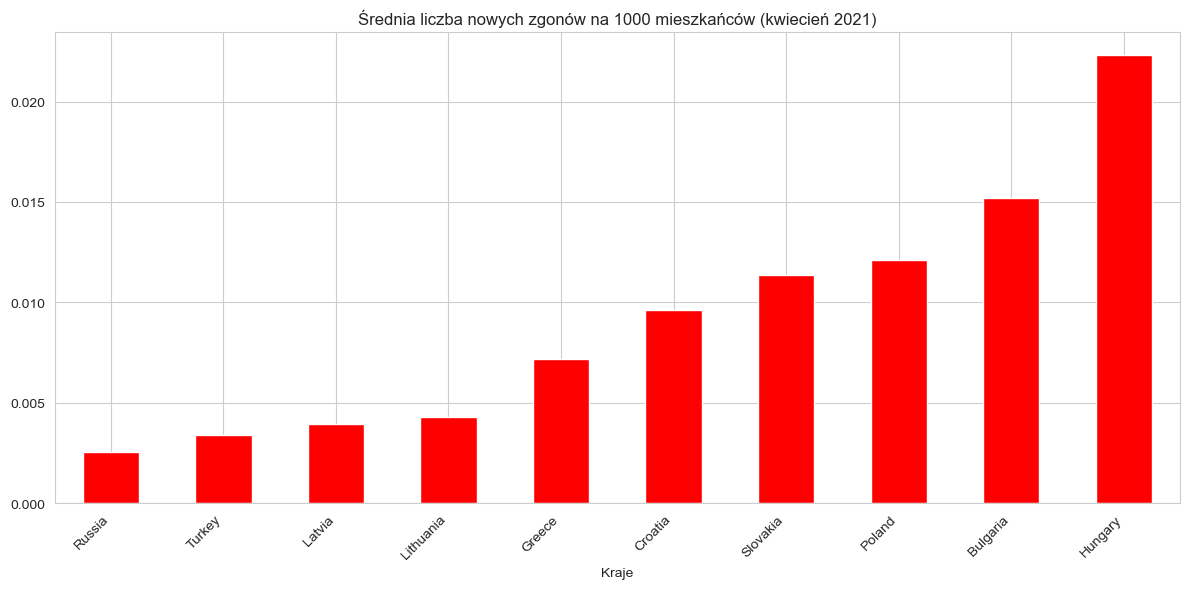

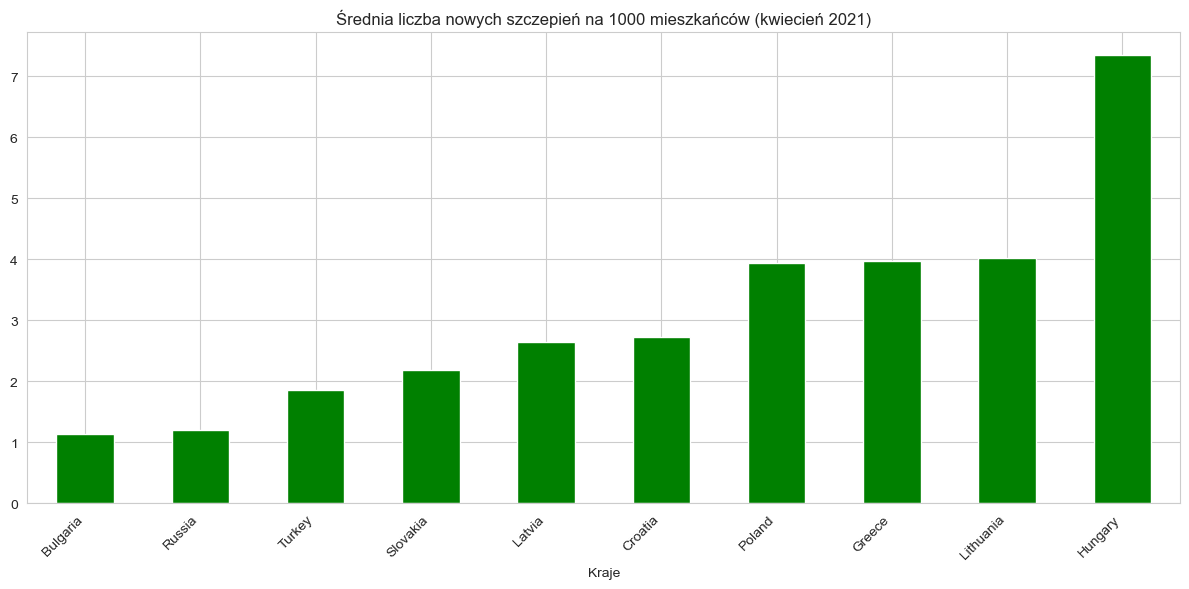

In [88]:
#4.0 Normalizacja do 1000 mieszkańcow
df_filtered["Cases_per_1000"] = (df_filtered["Total_confirmed_cases"] / df_filtered["2021 Population"]) * 1000
df_filtered["Vaccinations_per_1000"] = (df_filtered["Total_new_vaccinations"] / df_filtered["2021 Population"]) * 1000
df_filtered["Deceased_per_1000"] = (df_filtered["Total_new_deceased"] / df_filtered["2021 Population"]) * 1000
#4.1
confirmed = df_filtered.groupby("Country_name")["Cases_per_1000"].mean().sort_values()
plt.figure(figsize=(12, 6))
confirmed.plot(kind="bar", color="skyblue")
plt.title("Średnia liczba nowych zachorowań na 1000 mieszkańców (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#4.2
deceased = df_filtered.groupby("Country_name")["Deceased_per_1000"].mean().sort_values()
plt.figure(figsize=(12, 6))
deceased.plot(kind="bar", color="red")
plt.title("Średnia liczba nowych zgonów na 1000 mieszkańców (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#4.3
vaccinations = df_filtered.groupby("Country_name")["Vaccinations_per_1000"].mean().sort_values()
plt.figure(figsize=(12, 6))
vaccinations.plot(kind="bar", color="green")
plt.title("Średnia liczba nowych szczepień na 1000 mieszkańców (kwiecień 2021)")
plt.xlabel("Kraje")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Część 5 (poziom dodatkowy) - korelacja danych